In [1]:
##### PROGRAM TO CREATE THE SCATTER PLOT FOR UNCETAINTY SCENARIOS AND HYDROLOGICAL PARAMETERS
###Input data: the result file of the program to size and evaluate Rainwater Harvesting (RWH) systems performance with the results for all the 8 demands and areas considered.

#Open the csv file as a dataframe
##The file only open if the file is saved as CSV UTF-8. If it is not, it is necessary to save like this first.

import pandas as pd
file=pd.read_csv('inputcode4_inputcode5_ResultsIP.csv')
file.head()

,SCENARIO,Rainfall (mm/year),Rate increase tariff tot (%/year),Rate increase costs tot (%/year),Rate increase discount tot (%/year),Area (m²),Demand non-potable (m³/year),V ideal (m³),Satis (%),Consumption (m³/year),...,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,SCENARIO.1
0,1,1441.383333,1.149650,1.195381,0.897115,60,30.47385,2.5,66.732747,20.349037,...,101.720000,24.113333,6.603333,1.823333,4.520000,34.143333,108.406667,207.810000,244.826667,1
1,2,1467.523333,1.185727,1.063234,1.112363,60,30.47385,2.5,69.005552,21.047853,...,84.703333,25.286667,8.303333,4.130000,6.100000,54.343333,105.183333,196.990000,258.350000,2
2,3,1437.473333,1.174733,1.053368,0.961392,60,30.47385,2.5,70.862024,21.608192,...,78.526667,25.613333,5.223333,4.823333,10.183333,65.340000,103.553333,207.906667,254.260000,3
3,4,1481.323333,1.105787,1.047307,0.833342,60,30.47385,2.5,68.287403,20.819303,...,71.476667,27.570000,5.560000,3.193333,6.423333,39.676667,115.186667,219.740000,285.686667,4
4,5,1473.660000,1.087869,1.130841,1.447199,60,30.47385,2.5,71.703413,21.864759,...,92.460000,36.983333,6.830000,6.533333,7.410000,49.290000,112.276667,214.993333,267.810000,5


In [2]:
###To define the colors that will be used in the chart

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#Function to create a colormap
def make_colormap(seq):
    """Return a linear SegmentedColormap 
    seq: a sequence of floats and RGB-tuples. The floats should be increasing and in the interval (0,1). """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
#Use the function "make_colormap" to make the desired colormap for the chart
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'),0.2,c('darkred'), c('darkviolet'),0.5,  c('darkviolet'),c('darkblue'), 0.85, c('darkblue')])
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))

#Use the function "make_colormap" to make the desired colormap for the chart
c = mcolors.ColorConverter().to_rgb
gg = make_colormap(
    [c('gainsboro'),0.2,c('gainsboro'), c('lightsteelblue'),0.5,  c('lightsteelblue'),c('lightslategrey'), 0.85, c('lightslategrey')])
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))


C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anacond

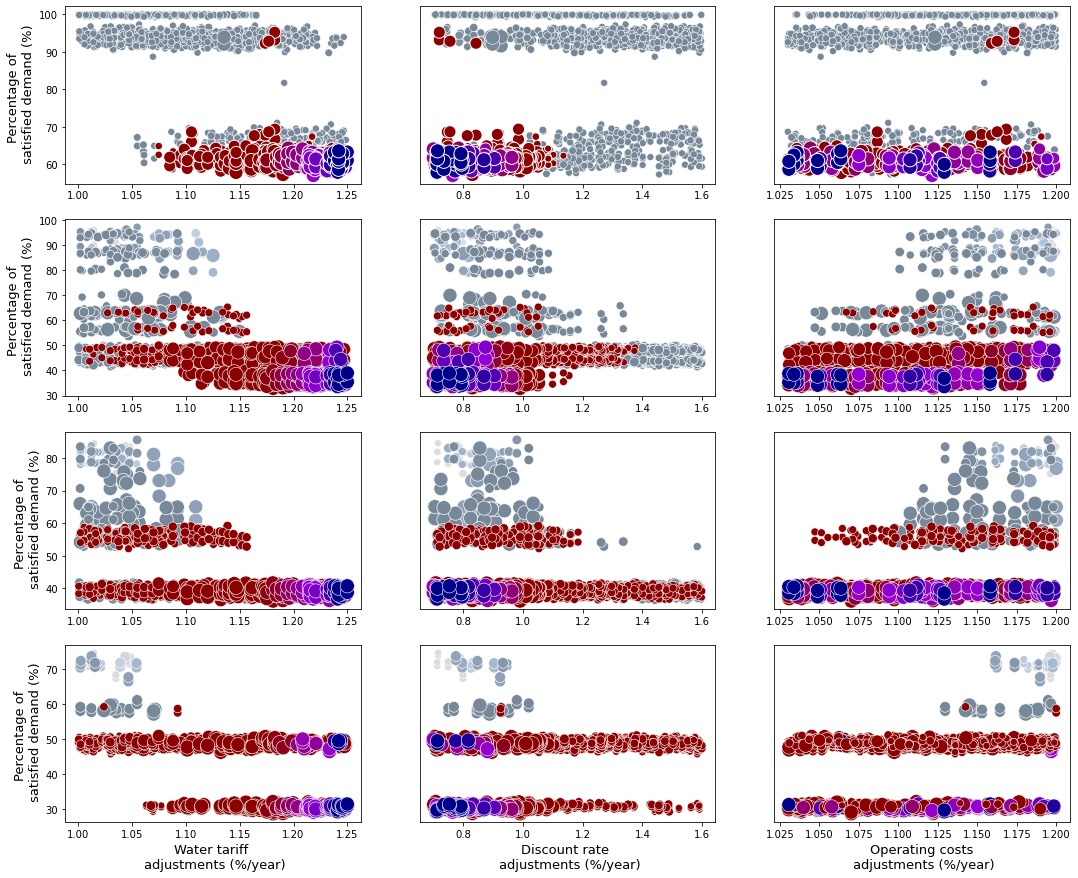

In [3]:
##### PROGRAM TO CREATE THE SCATTER PLOT FOR SATISFIED DEMAND x UNCETAINTY SCENARIOS

import seaborn as sns

#Separates scenarios with different demand values and then separates scenarios with positive and negative NPV
##Demand 1
file1=file.iloc[0:2000,:].sort_values(by=["NPV max"],ascending=True)
positive1=file1['NPV max']>=0
negative1=file1['NPV max']<0
file1p=file1[positive1]
file1n=file1[negative1]
##Demand 3
file2=file.iloc[4000:6000,:].sort_values(by=["NPV max"],ascending=True)
positive2=file2['NPV max']>=0
negative2=file2['NPV max']<0
file2p=file2[positive2]
file2n=file2[negative2]
##Demand 5
file3=file.iloc[8000:10000,:].sort_values(by=["NPV max"],ascending=True)
positive3=file3['NPV max']>=0
negative3=file3['NPV max']<0
file3p=file3[positive3]
file3n=file3[negative3]
##Demand 7
file4=file.iloc[12000:14000,:].sort_values(by=["NPV max"],ascending=True)
positive4=file4['NPV max']>=0
negative4=file4['NPV max']<0
file4p=file4[positive4]
file4n=file4[negative4]
#To set the size of the figure
f=plt.figure(figsize=(18,15))
#To create the scatter plot for each demand
##OBS.: seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None)
##Plot 1 - demand: 1 and du: water tariff
f1=plt.subplot(4,3,1)
f1=sns.scatterplot(file1n.iloc[:,2], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f1=sns.scatterplot(file1p.iloc[:,2], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('',fontsize=14)
##Plot 2 - demand: 1 and du: discount rate
f2=plt.subplot(4,3,2)
f2=sns.scatterplot(file1n.iloc[:,4], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f2=sns.scatterplot(file1p.iloc[:,4], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 3 - demand: 1 and du: operating costs
f3=plt.subplot(4,3,3)
f3=sns.scatterplot(file1n.iloc[:,3], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f3=sns.scatterplot(file1p.iloc[:,3], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 4 - demand: 3 and du: water tariff
f4=plt.subplot(4,3,4)
f4=sns.scatterplot(file2n.iloc[:,2], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f4=sns.scatterplot(file2p.iloc[:,2], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('',fontsize=14)
##Plot 5 - demand: 3 and du: discount rate
f5=plt.subplot(4,3,5)
f5=sns.scatterplot(file2n.iloc[:,4], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f5=sns.scatterplot(file2p.iloc[:,4], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 6 - demand: 3 and du: operating costs
f6=plt.subplot(4,3,6)
f6=sns.scatterplot(file2n.iloc[:,3], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f6=sns.scatterplot(file2p.iloc[:,3], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 7 - demand: 5 and du: water tariff
f7=plt.subplot(4,3,7)
f7=sns.scatterplot(file3n.iloc[:,2], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f7=sns.scatterplot(file3p.iloc[:,2], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('',fontsize=14)
##Plot 8 - demand: 5 and du: discount rate
f8=plt.subplot(4,3,8)
f8=sns.scatterplot(file3n.iloc[:,4], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f8=sns.scatterplot(file3p.iloc[:,4], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 9 - demand: 5 and du: operating costs
f9=plt.subplot(4,3,9)
f9=sns.scatterplot(file3n.iloc[:,3], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f9=sns.scatterplot(file3p.iloc[:,3], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
##Plot 10 - demand: 7 and du: water tariff
f10=plt.subplot(4,3,10)
f10=sns.scatterplot(file4n.iloc[:,2], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f10=sns.scatterplot(file4p.iloc[:,2], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('Water tariff \n adjustments (%/year)',fontsize=13)
##Plot 11 - demand: 7 and du: discount rate
f11=plt.subplot(4,3,11)
f11=sns.scatterplot(file4n.iloc[:,4], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f11=sns.scatterplot(file4p.iloc[:,4], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('Discount rate \n adjustments (%/year)',fontsize=13)
plt.yticks(())
##Plot 12 - demand: 7 and du: operating costs
f12=plt.subplot(4,3,12)
f12=sns.scatterplot(file4n.iloc[:,3], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f12=sns.scatterplot(file4.iloc[:,3], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('Operating costs\n adjustments (%/year)',fontsize=13)
plt.yticks(())
#Save the figure
plt.savefig('Scatter_plot-DUS.png',transparent=True)
plt.show()

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anacond

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gabri\anacond

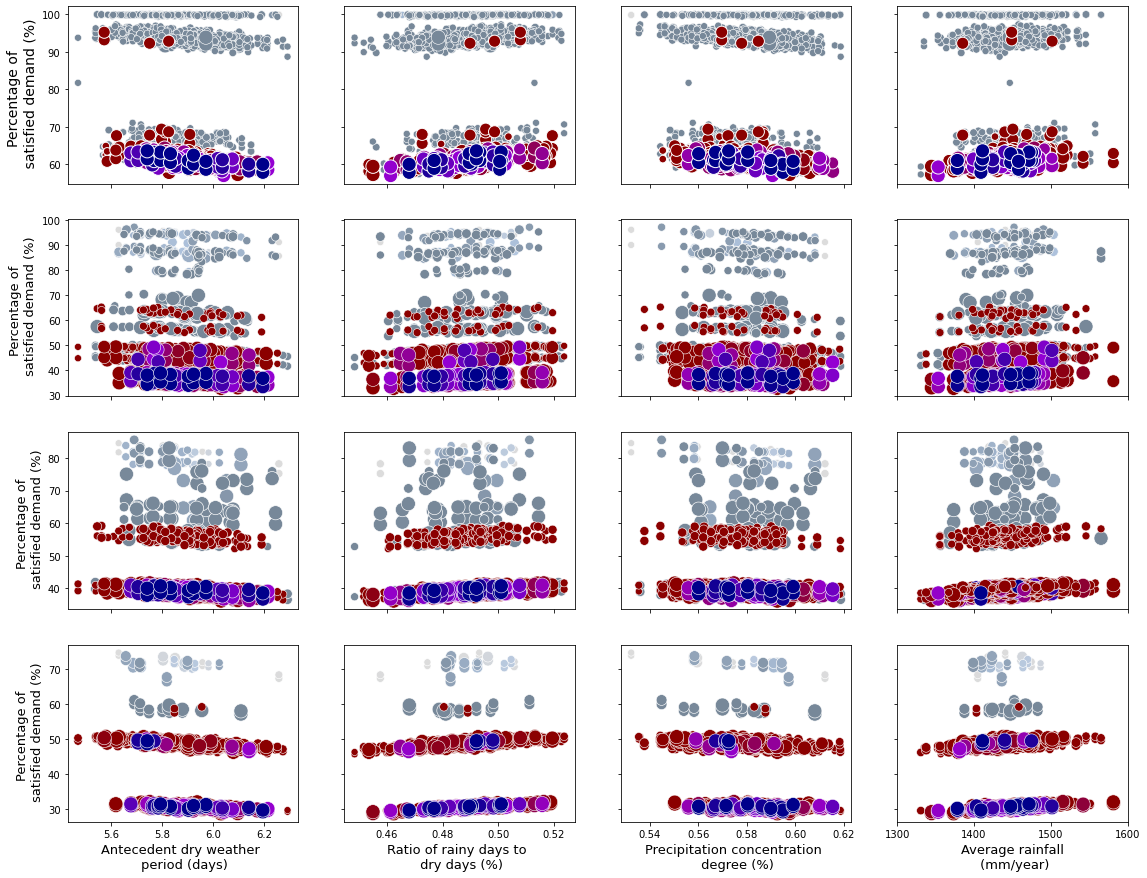

In [4]:
##### PROGRAM TO CREATE THE SCATTER PLOT FOR SATISFIED DEMAND x HYDROLOGICAL PARAMETERS

import seaborn as sns

#Separates scenarios with different demand values and then separates scenarios with positive and negative NPV
##Demand 1
file1=file.iloc[0:2000,:].sort_values(by=["NPV max"],ascending=True)
positive1=file1['NPV max']>=0
negative1=file1['NPV max']<0
file1p=file1[positive1]
file1n=file1[negative1]
##Demand 3
file2=file.iloc[4000:6000,:].sort_values(by=["NPV max"],ascending=True)
positive2=file2['NPV max']>=0
negative2=file2['NPV max']<0
file2p=file2[positive2]
file2n=file2[negative2]
##Demand 5
file3=file.iloc[8000:10000,:].sort_values(by=["NPV max"],ascending=True)
positive3=file3['NPV max']>=0
negative3=file3['NPV max']<0
file3p=file3[positive3]
file3n=file3[negative3]
##Demand 7
file4=file.iloc[12000:14000,:].sort_values(by=["NPV max"],ascending=True)
positive4=file4['NPV max']>=0
negative4=file4['NPV max']<0
file4p=file4[positive4]
file4n=file4[negative4]
#To set the size of the figure
f=plt.figure(figsize=(19,15))
#To create the scatter plot for each demand
##Plot 1 - demand: 1 and antecedent dry weather period
f1=plt.subplot(4,4,1)
f1=sns.scatterplot(file1n.iloc[:,89], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f1=sns.scatterplot(file1p.iloc[:,89], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=14)
plt.xlabel('',fontsize=14)
f1.axes.xaxis.set_ticklabels([])
##Plot 2 - demand: 1 and ratio of rainy days to dry days
f2=plt.subplot(4,4,2)
f2=sns.scatterplot(file1n.iloc[:,90], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f2=sns.scatterplot(file1p.iloc[:,90], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f2.axes.xaxis.set_ticklabels([])
f2.axes.yaxis.set_ticklabels([])
##Plot 3 - demand: 1 and precipitation concentration degree
f3=plt.subplot(4,4,3)
f3=sns.scatterplot(file1n.iloc[:,91], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f3=sns.scatterplot(file1p.iloc[:,91], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
plt.yticks(())
f3.axes.xaxis.set_ticklabels([])
f3.axes.yaxis.set_ticklabels([])
##Plot 4 - demand: 1 and average rainfall
f4=plt.subplot(4,4,4)
f4=sns.scatterplot(file1n.iloc[:,74], file1n.iloc[:,27],hue=file1n.iloc[:,21],size=file1n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f4=sns.scatterplot(file1p.iloc[:,74], file1p.iloc[:,27],hue=file1p.iloc[:,21],size=file1p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.xticks((1300,1400,1500,1600))
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f4.axes.xaxis.set_ticklabels([])
f4.axes.yaxis.set_ticklabels([])
##Plot 5 - demand: 3 and antecedent dry weather period
f5=plt.subplot(4,4,5)
f5=sns.scatterplot(file2n.iloc[:,89], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f5=sns.scatterplot(file2p.iloc[:,89], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('',fontsize=14)
f5.axes.xaxis.set_ticklabels([])
##Plot 6 - demand: 3 and ratio of rainy days to dry days
f6=plt.subplot(4,4,6)
f6=sns.scatterplot(file2n.iloc[:,90], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f6=sns.scatterplot(file2p.iloc[:,90], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f6.axes.xaxis.set_ticklabels([])
f6.axes.yaxis.set_ticklabels([])
##Plot 7 - demand: 3 and precipitation concentration degree
f7=plt.subplot(4,4,7)
f7=sns.scatterplot(file2n.iloc[:,91], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f7=sns.scatterplot(file2p.iloc[:,91], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f7.axes.xaxis.set_ticklabels([])
f7.axes.yaxis.set_ticklabels([])
##Plot 8 - demand: 3 and average rainfall
f8=plt.subplot(4,4,8)
f8=sns.scatterplot(file2n.iloc[:,74], file2n.iloc[:,27],hue=file2n.iloc[:,21],size=file2n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f8=sns.scatterplot(file2p.iloc[:,74], file2p.iloc[:,27],hue=file2p.iloc[:,21],size=file2p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.xticks((1300,1400,1500,1600))
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f8.axes.xaxis.set_ticklabels([])
f8.axes.yaxis.set_ticklabels([])
##Plot 9 - demand: 5 and antecedent dry weather period
f9=plt.subplot(4,4,9)
f9=sns.scatterplot(file3n.iloc[:,89], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f9=sns.scatterplot(file3p.iloc[:,89], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('',fontsize=14)
f9.axes.xaxis.set_ticklabels([])
##Plot 10 - demand: 5 and ratio of rainy days to dry days
f10=plt.subplot(4,4,10)
f10=sns.scatterplot(file3n.iloc[:,90], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f10=sns.scatterplot(file3p.iloc[:,90], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f10.axes.xaxis.set_ticklabels([])
f10.axes.yaxis.set_ticklabels([])
##Plot 11 - demand: 5 and precipitation concentration degree
f11=plt.subplot(4,4,11)
f11=sns.scatterplot(file3n.iloc[:,91], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f11=sns.scatterplot(file3p.iloc[:,91], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f11.axes.xaxis.set_ticklabels([])
f11.axes.yaxis.set_ticklabels([])
##Plot 12 - demand: 5 and average rainfall
f12=plt.subplot(4,4,12)
f12=sns.scatterplot(file3n.iloc[:,74], file3n.iloc[:,27],hue=file3n.iloc[:,21],size=file3n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f12=sns.scatterplot(file3.iloc[:,74], file3p.iloc[:,27],hue=file3p.iloc[:,21],size=file3p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.xticks((1300,1400,1500,1600))
plt.ylabel('',fontsize=14)
plt.xlabel('',fontsize=14)
f12.axes.xaxis.set_ticklabels([])
f12.axes.yaxis.set_ticklabels([])
##Plot 13 - demand: 7 and antecedent dry weather period
f13=plt.subplot(4,4,13)
f13=sns.scatterplot(file4n.iloc[:,89], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f13=sns.scatterplot(file4p.iloc[:,89], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('Percentage of \n satisfied demand (%)',fontsize=13)
plt.xlabel('Antecedent dry weather \n period (days)',fontsize=13)
##Plot 14 - demand: 7 and ratio of rainy days to dry days 
f14=plt.subplot(4,4,14)
f14=sns.scatterplot(file4n.iloc[:,90], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f14=sns.scatterplot(file4p.iloc[:,90], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.ylabel('',fontsize=14)
plt.xlabel('Ratio of rainy days to \n dry days (%)',fontsize=13)
f14.axes.yaxis.set_ticklabels([])
##Plot 15 - demand: 7 and precipitation concentration degree
f15=plt.subplot(4,4,15)
f15=sns.scatterplot(file4n.iloc[:,91], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=False)
f15=sns.scatterplot(file4p.iloc[:,91], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=False)
plt.ylabel('',fontsize=14)
plt.xlabel('Precipitation concentration \n degree (%)',fontsize=13)
f15.axes.yaxis.set_ticklabels([])
##Plot 16 - demand: 7 and average rainfall
f16=plt.subplot(4,4,16)
f16=sns.scatterplot(file4n.iloc[:,74], file4n.iloc[:,27],hue=file4n.iloc[:,21],size=file4n.iloc[:,17],palette=gg,sizes=(50,200),legend=())
f16=sns.scatterplot(file4p.iloc[:,74], file4p.iloc[:,27],hue=file4p.iloc[:,21],size=file4p.iloc[:,17],palette=rvb,sizes=(50,200),legend=())
plt.xticks((1300,1400,1500,1600))
plt.ylabel('',fontsize=14)
plt.xlabel('Average rainfall\n (mm/year)',fontsize=13)
f16.axes.yaxis.set_ticklabels([])

plt.savefig('Scatter_plot-hydrologicalparameters.png',transparent=True)
plt.show()